# Credit Card Customer Segmentation

## About Dataset

Credit Card Customer Data is a comprehensive dataset that provides a detailed analysis of a hypothetical ideal customers of credit card. By collecting and summarizing the usage behavior of about 9000 active credit card holders during the last 6 months, this dataset provides valuable insights that can help a business better understand its customers.

The dataset includes 8950 records and 18 columns, providing a wealth of information about the credit card customer base. Each column represents a specific aspect of the customer's profile, including their unique Customer ID, Purchase, Balance, Tenure etc.

By analyzing this data, businesses can gain valuable insights into their customers' preferences, behaviors, and purchasing habits. For example, they can segment customers by balance, credit limit ot tenure of use to better understand how these factors impact their purchasing decisions.

## Data Dictionary

**CUST_ID**

* Numerical
* It is a unique identifier for each customer.

**BALANCE**

* Numerical
* The Balance amount left in their account to make purchases.

**BALANCE_FREQUENCY**
* Numerical
* How frequently the Balance is updated for a customer. This score between **0** to **1**. (1 = **frequently updated**, 0 = **not frequently updated**)

**PURCHASES**
* Numerical
* The amount of purchases made from account of the customer, usually measured in dollars or another currency. Purchase can be used to segment customers into different purchase groups, which can help identify purchasing patterns and preferences among different levels.

**ONEOFF_PURCHASES**
* Numerical
* Maximum purchase amount done in one-go by a customer.

**INSTALLMENTS_PURCHASES**
* Numerical
* Amount of purchase done in installment by a customer.

**CASH_ADVANCE**
* Numerical
* Cash in advance given by the customer.

**PURCHASES_FREQUENCY**
* Numerical
* How frequently the Purchases are being made by a customer. The score between **0** to **1** (1 = **frequently purchased**, 0 = **not frequently purchased**)

**ONEOFFPURCHASESFREQUENCY**
* Numerical
* How frequently the Purchases are happening in one-go by a customer. The score between **0** to **1** (1 = **frequently purchased**, 0 = **not frequently purchased**)

**CASHADVANCEFREQUENCY**
* Numerical
* How frequently the cash in advance being paid by a customer.

**CASHADVANCETRX**
* Numerical
* Number of Transactions made with "Cash in Advanced" by a customer.

**PURCHASES_TRX**
* Numerical
* Number of purchase transactions made by a customer.

**CREDIT_LIMIT**
* Numerical
* Limit of Credit Card for a customer, usually measured in dollars or another currency.

**PAYMENTS**
* Numerical
* Amount of payment done by a customer, usually measured in dollars or another currency.

**MINIMUM_PAYMENTS**
* Numerical
* Minimum amount of payment done by a customer, usually measured in dollars or another currency.

**PRCFULLPAYMENT**
* Numerical
* Percent of full payment paid by a customer.

**TENURE**
* Numerical
* Tenure of credit card service for a customer in months.



## Problem Statement

* Conduct an in-depth Exploratory Data Analysis on a dataset, uncovering insights, patterns, and relationships within the data.
* Create a profile for different groups(or clusters) of customers those are frequent in credit card purchase.

## Load the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")


In [ ]:
from sklearn.preprocessing import StandardScaler

## Reading Dataset and getting what it contains

In [ ]:
import os
folder_path = "drive/MyDrive/Colab Notebooks/dscourse/data"
file_path = os.path.join(folder_path, "CC GENERAL.csv")

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
# Print 1st 5 rows
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# Print the shape
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 8950
Number of columns: 18


In [ ]:
# Summarize the statistics of the dataset
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### Remove Unnecessary Columns

Removing unnecessary columns helps in reducing noise, optimizing resources and enhance quality and clarity of data.

Here CUST_ID column is not needed for EDA or modeling, so it should be removed.

In [ ]:
df.drop(["CUST_ID"], axis=1, inplace=True)

#### Checking Data Types
By checking datatype of each column we can identify the categorical and numerical columns present in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [ ]:
cat_columns = []
num_columns = []

for col in df.columns:
  if len(df[col].unique()) < 10:
    # We assume that categorical by nature if number of unique values are less than 10
    cat_columns.append(col)
  else:
    num_columns.append(col)

print(f"Number of categorical features: {len(cat_columns)}")
print(f"Categorical Columns: {cat_columns}")
print("-" * 60)
print(f"Number of numerical features: {len(num_columns)}")
print(f"Numerical Columns: {num_columns}")

Number of categorical features: 1
Categorical Columns: ['TENURE']
------------------------------------------------------------
Number of numerical features: 16
Numerical Columns: ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']


##### Missing Value Detection

Missing value detection is essential to chack the quality of the data. If present impute it with proper value so that quality of the data is maintained for robust statistical analysis.

In [ ]:
# Detect missing values
def detect_missing(df):
  missing_cols = []
  for col in df.columns:
    if df[col].isnull().sum() > 0:
      missing_cols.append(col)
      print(f"Number of missing values in {col}: {df[col].isnull().sum()}")
  return missing_cols

In [ ]:
missing_cols = detect_missing(df)
if len(missing_cols) == 0:
    print(f"No missing value in any feature in the dataset.")

Number of missing values in CREDIT_LIMIT: 1
Number of missing values in MINIMUM_PAYMENTS: 313


In [ ]:
# Impute missing values.
# As both columns are numrical we impute them with the mean of the respective column.
for col in missing_cols:
  mean = df[col].mean()
  df[col].fillna(mean, inplace= True)
# Sanity check
missing_cols = detect_missing(df)
if len(missing_cols) == 0:
    print(f"No missing value in any feature in the dataset.")


No missing value in any feature in the dataset.


#### Duplicate Row Detection

Detecting duplicate rows and removing them is vital for ensuring quality of data, integrity, accuracy and performance.

In [ ]:
print(f"Number of duplicate rows {df[df.duplicated()].shape[0]}")

Number of duplicate rows 0


#### Data Preparation

Scaling features ensure that all features contribute equally to the cluster formation, leading to more meaningful and accurate clusters.

In [ ]:
sc = StandardScaler()
scaled = sc.fit_transform(df.values)

In [ ]:
scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

## Hierarchical Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

### Find Appropreate Numer of clusters and linkage method

We find the **silhouette score** and **bouldin index** for each number of cluster ranges **2-10** for each linkage and plot them.

* Higher silhouette score means better clustering
* Lower bouldin index means better clustering.

So will will find which number of clusters in which linkage we get highest silhouette score and lowest bouldin index.

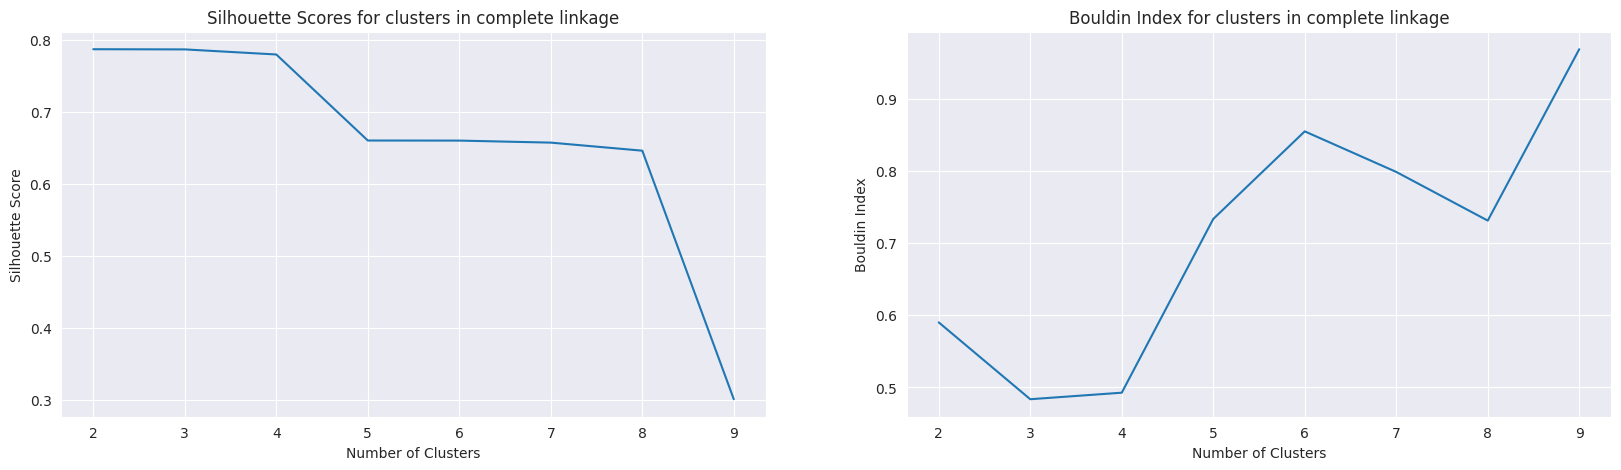

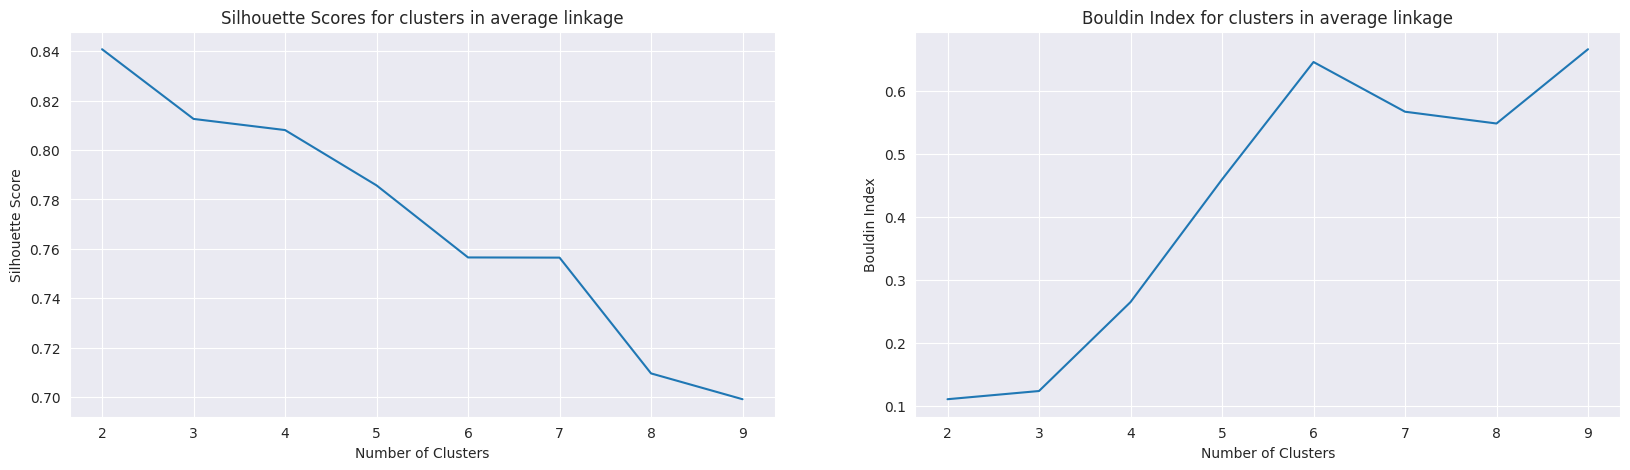

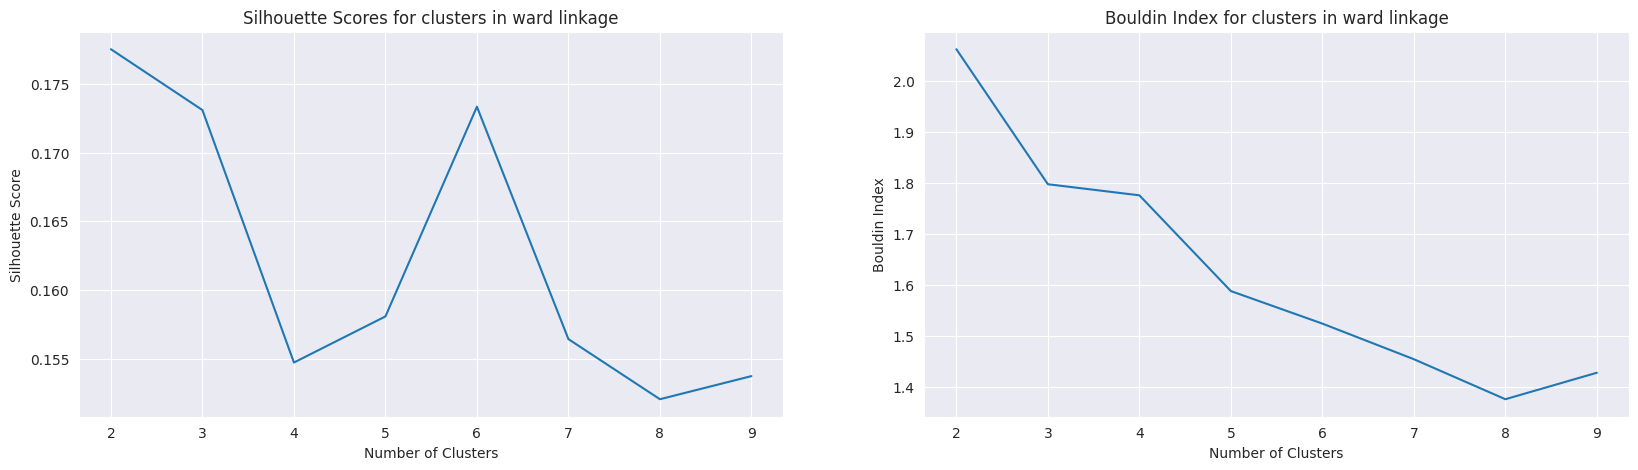

In [ ]:
linkages = ["complete", "average", "ward"]

for l in linkages:
  clusters = range(2, 10)
  s_scores = []
  b_scores = []
  for c in clusters:
    ac= AgglomerativeClustering(n_clusters=c, metric="euclidean", linkage=l)
    labels = ac.fit_predict(scaled)

    # Find Silhouette Score
    ss= silhouette_score(scaled, labels)
    s_scores.append(ss)

    # Find Bouldin index
    bi = davies_bouldin_score(scaled, labels)
    b_scores.append(bi)

  # Plot Silhouette score and Bouldin Index
  fig, axes = plt.subplots(nrows = 1, ncols=2, figsize=(20, 5))

  sns.lineplot(ax= axes[0], x= clusters, y= s_scores)
  axes[0].set_title(f"Silhouette Scores for clusters in {l} linkage")
  axes[0].set_xlabel("Number of Clusters")
  axes[0].set_ylabel("Silhouette Score")

  sns.lineplot(ax= axes[1], x= clusters, y= b_scores)
  axes[1].set_title(f"Bouldin Index for clusters in {l} linkage")
  axes[1].set_xlabel("Number of Clusters")
  axes[1].set_ylabel("Bouldin Index")



### Observations


* From Silhouette Score and Davies-Bouldin Index we found that Silhouette score is maximum for **3** clusters and Davies-Bouldin index is minimum for the same number of clusters in **complete** linkage.

**We will use complete linkage for 3 clusters for our problem.**

In [ ]:
ac = AgglomerativeClustering(n_clusters= 3, metric="euclidean", linkage="complete")
labels = ac.fit_predict(scaled)
df["cluster"] = labels

In [ ]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [ ]:
# Unique cluster values
df["cluster"].unique()

array([0, 1, 2])

In [ ]:
input_x = df.iloc[:,:-1].values

In [ ]:
output_y = df.iloc[:, -1]

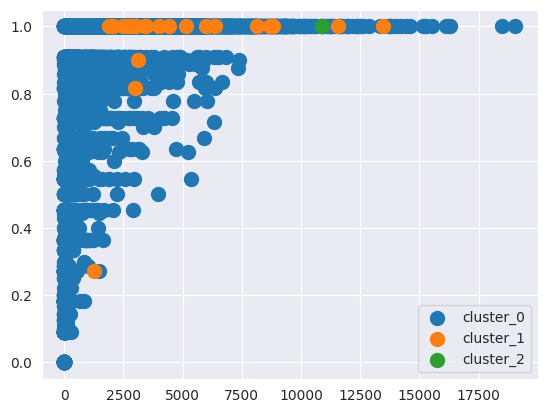

In [ ]:
for i in df["cluster"].unique():
  plt.scatter(input_x[output_y==i,0],input_x[output_y==i,1],s=100, label='cluster_'+ str(i))
plt.legend()
plt.show()

In [ ]:
df["cluster"].value_counts()

cluster
0    8926
1      23
2       1
Name: count, dtype: int64

## Analyzing Characteristics of the identified clusters

#### Plot Categorical Features with each Cluster

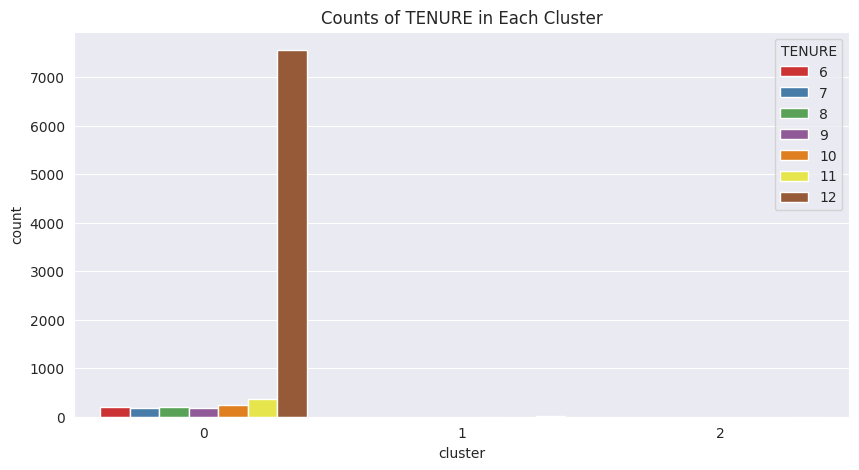

In [ ]:
for col in cat_columns:
  plt.figure(figsize=(10, 5))
  sns.countplot(data=df,
                x="cluster",
                hue=col,
                order=sorted(df["cluster"].unique()),
                palette="Set1")
  plt.title(f"Counts of {col} in Each Cluster")

#### Distribution of Numerical Features with each Cluster

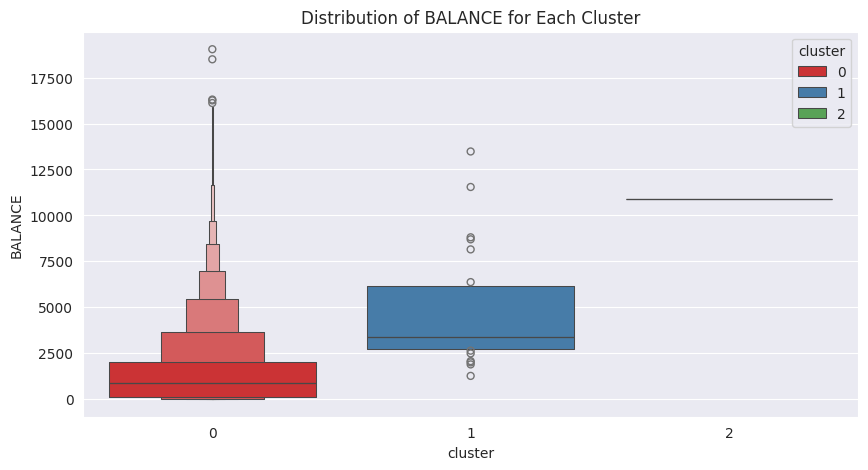

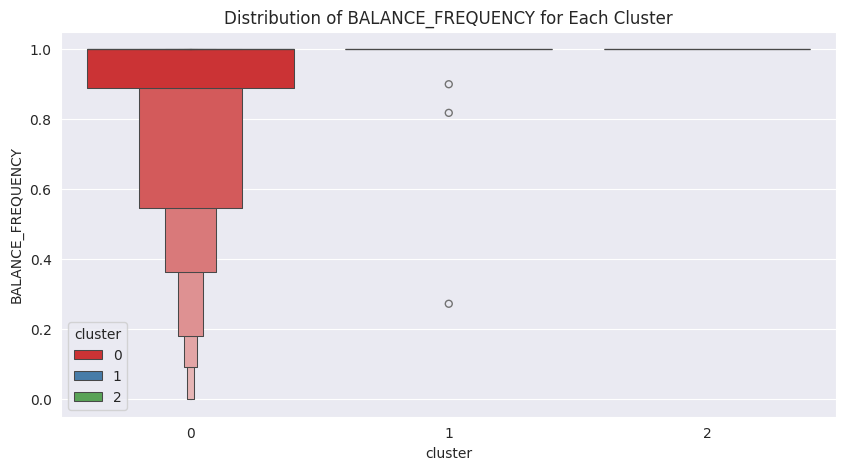

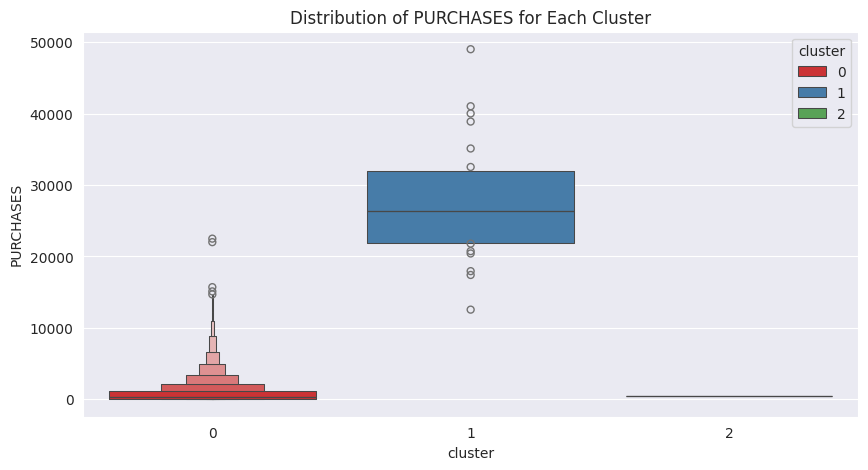

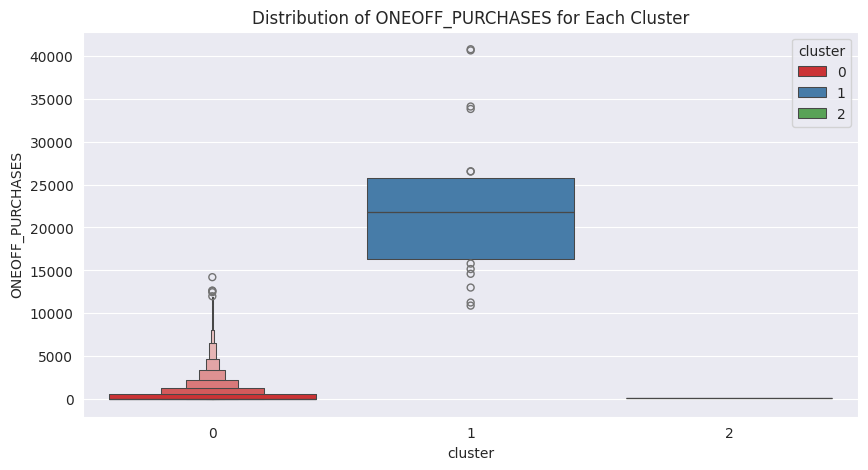

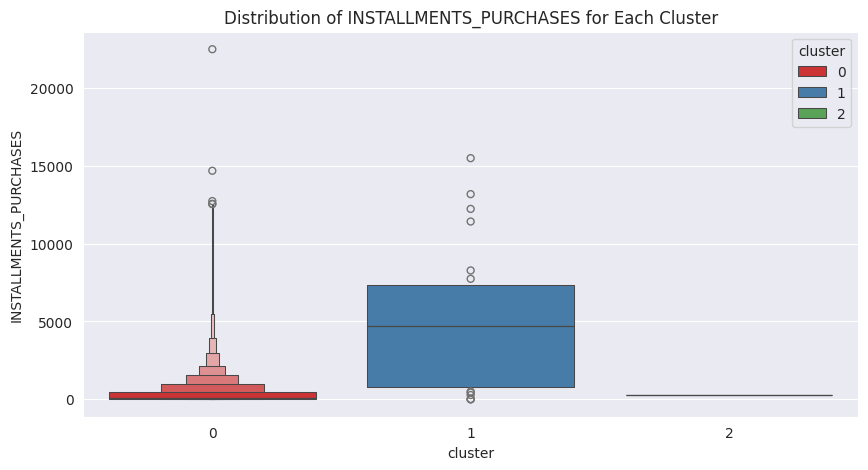

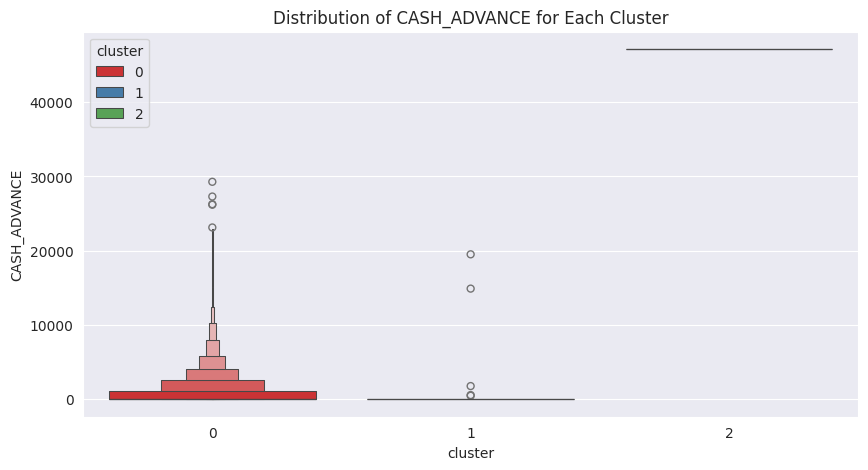

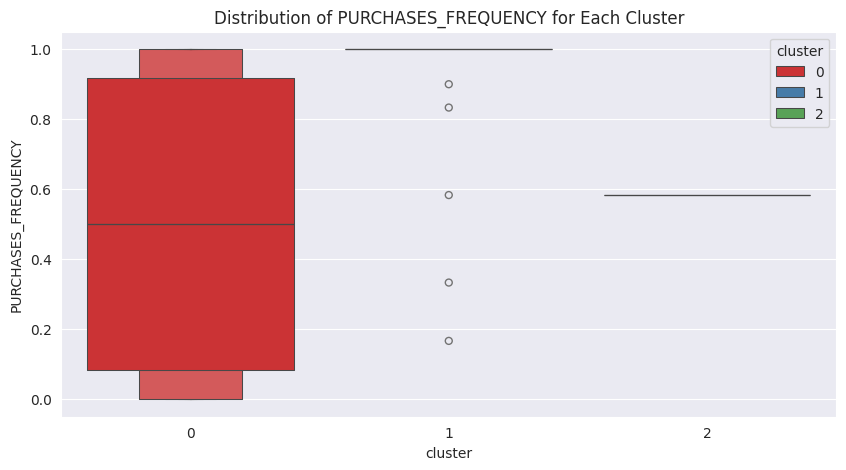

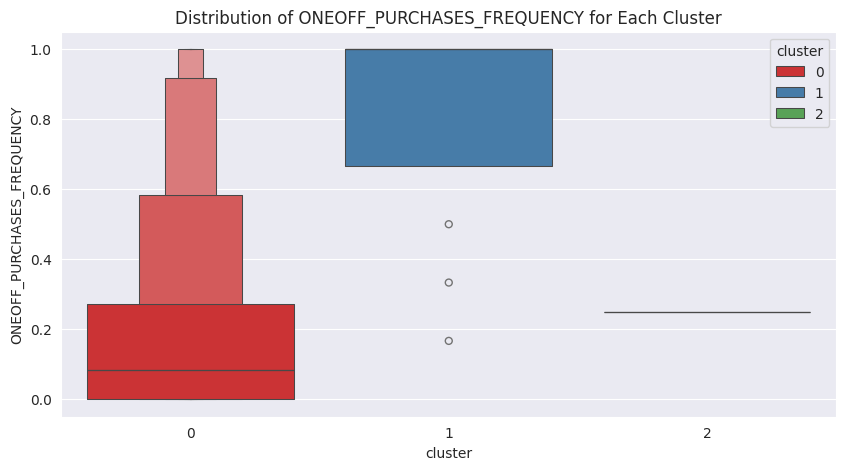

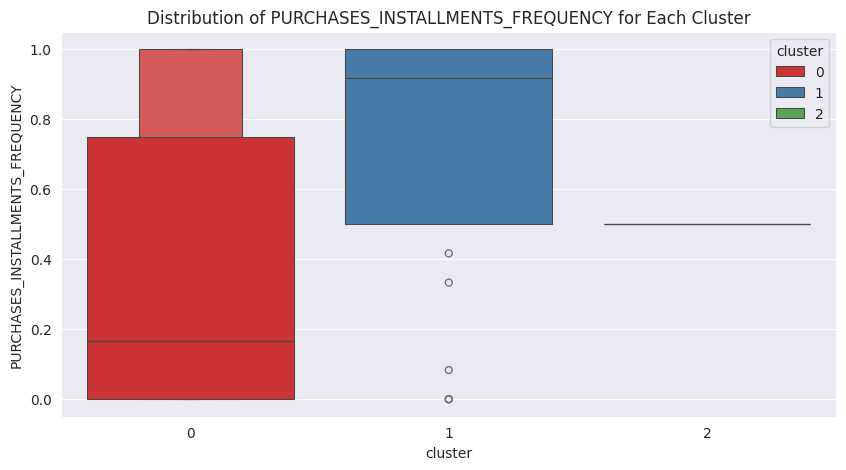

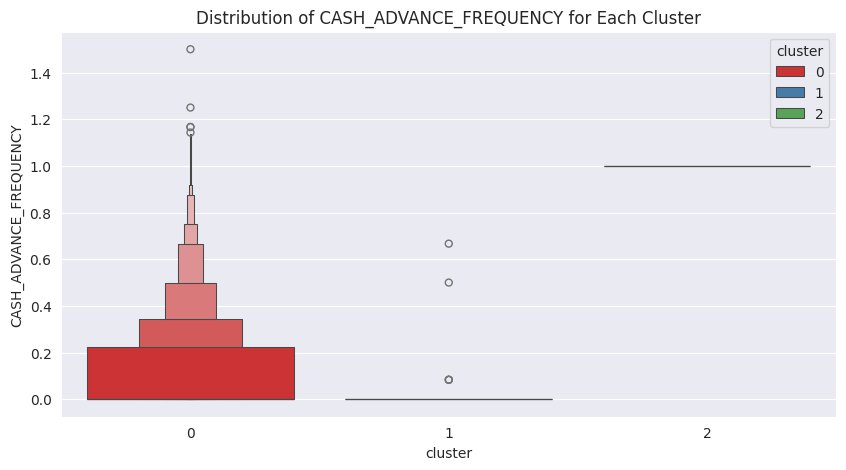

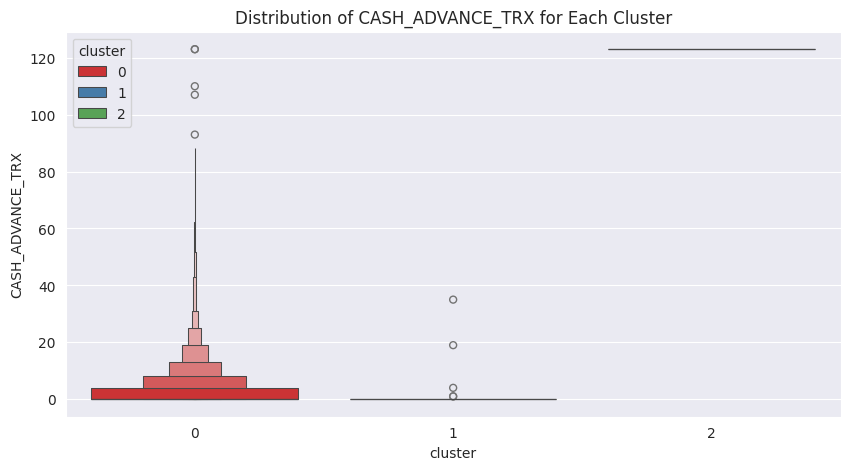

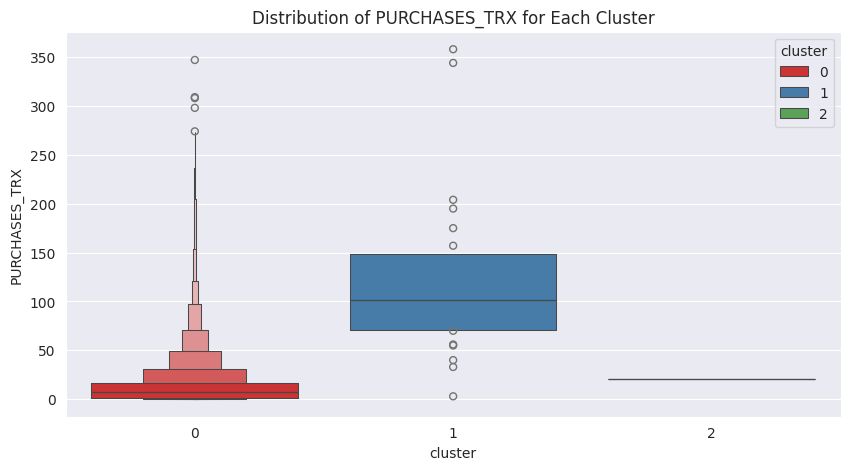

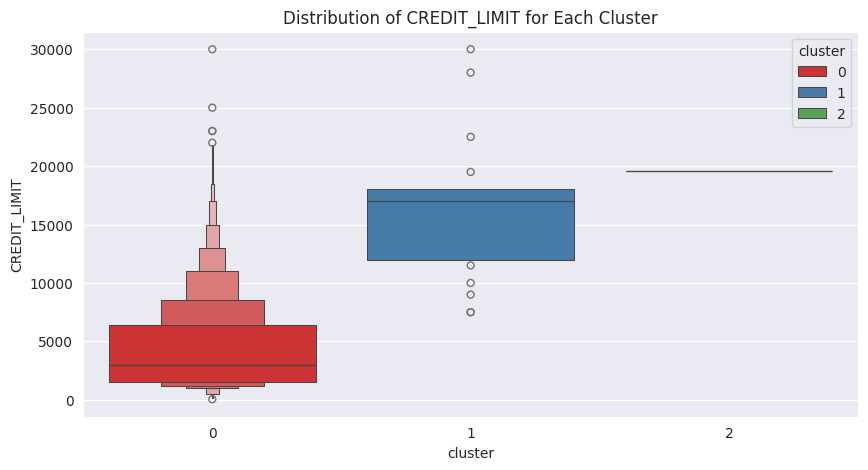

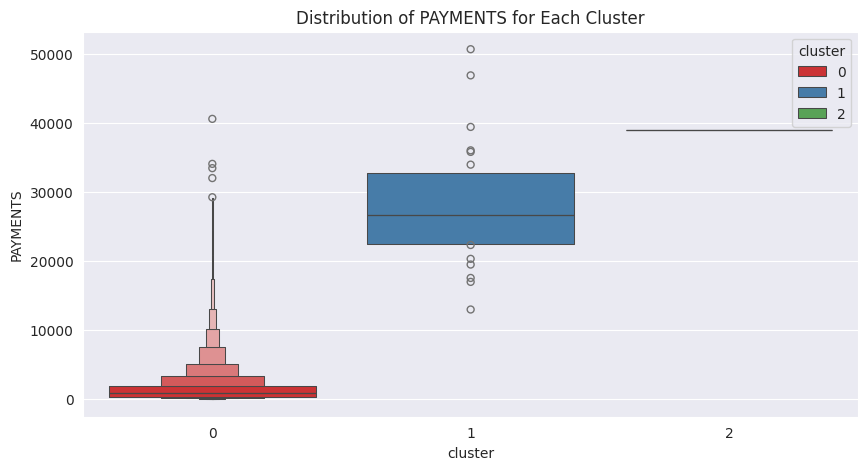

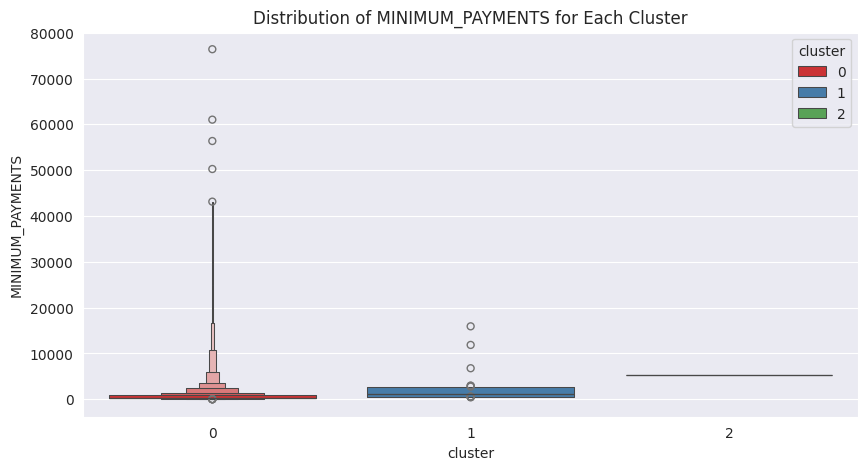

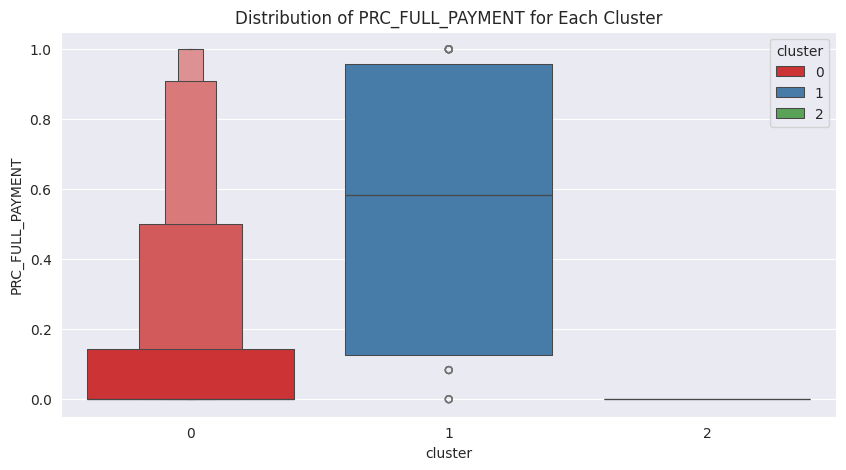

In [ ]:
for col in num_columns:
  plt.figure(figsize=(10, 5))
  sns.boxenplot(data= df,
                x="cluster",
                y=col,
                hue="cluster",
                order=sorted(df["cluster"].unique()),
                palette="Set1")
  plt.title(f"Distribution of {col} for Each Cluster")

### Conclutions

* Analyzing the scatter plot for each cluster we can say that this clustering is very much **imbalanced**. Most of the data points(8926) present in cluster 0 and cluster 1 and cluster 2 has fewer data points.
* Analyzing the categorical features in each cluster we can not find any contribution to 1 ad 2 cluster.
* Analyzing the numerical features in each cluster we can not find any clear contribution to 1 ad 2 cluster.

**We should not use Hierarchical clustering for this data set. We should use some other clustering technique like K-Means.**

## K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

## Find the Appropriate Number of Clusters

Here we train the model for a range**(2-11)** clusters and using **Elbow** method find the best souted number of cluster for this data set.

<Axes: >

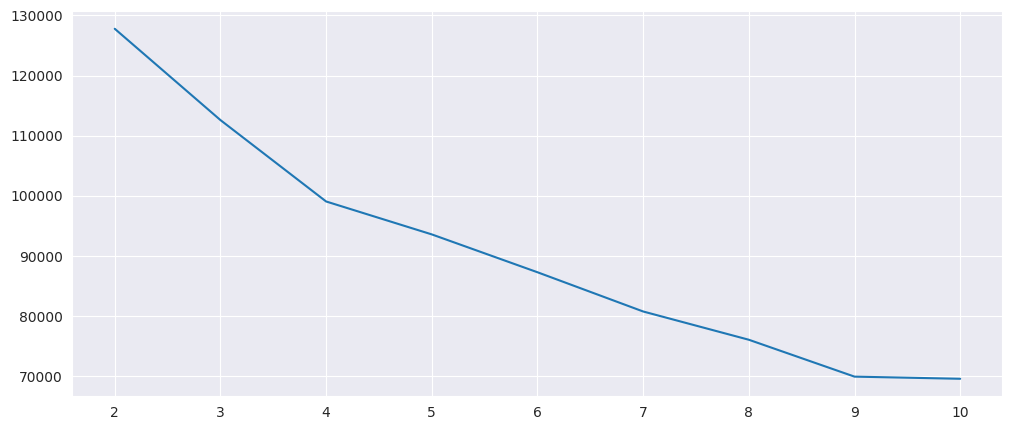

In [ ]:
wcss = []

clusters = range(2, 11)
for c in clusters:
  km = KMeans(n_clusters = c, random_state=42, n_init="auto")
  km.fit(scaled)
  wcss.append(km.inertia_)

# Draw the line plot for wcss for the range of clusters and find the elbow.
plt.figure(figsize=(12, 5))
sns.lineplot(x=clusters, y= wcss)


## Observations

Here we can find two elbow points 4 and 9. We use 4 as it is the 1st one.

In [ ]:
km = KMeans(n_clusters = 4, random_state=42, n_init="auto")
km.fit(scaled)


KMeans(n_clusters=4, n_init='auto', random_state=42)

In [ ]:
df["cluster"] = km.labels_

In [ ]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [ ]:
df["cluster"].value_counts().sort_index()

cluster
0    3356
1    3987
2    1211
3     396
Name: count, dtype: int64

In [ ]:
input_x = df.iloc[:, :-1].values

In [ ]:
output_y = df.iloc[:, -1].values

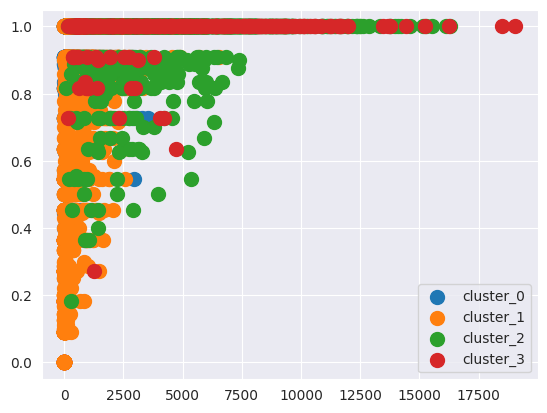

In [ ]:
for i in sorted(df["cluster"].unique()):
  plt.scatter(input_x[output_y==i,0],input_x[output_y==i,1],s=100, label='cluster_'+ str(i))
plt.legend()
plt.show()

## Analyzing Characteristics of the identified clusters

#### Plot Categorical Features with each Cluster

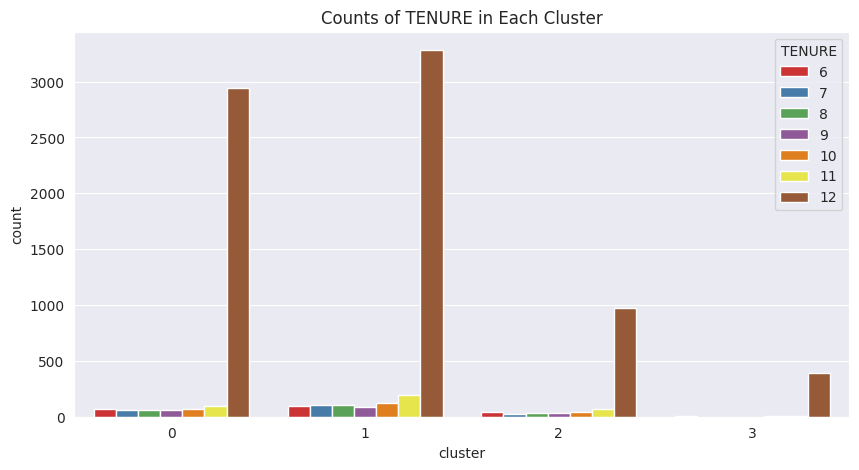

In [ ]:
for col in cat_columns:
  plt.figure(figsize=(10, 5))
  sns.countplot(data=df,
                x="cluster",
                hue=col,
                order=sorted(df["cluster"].unique()),
                palette="Set1")
  plt.title(f"Counts of {col} in Each Cluster")

#### Distribution of Numerical Features with each Cluster

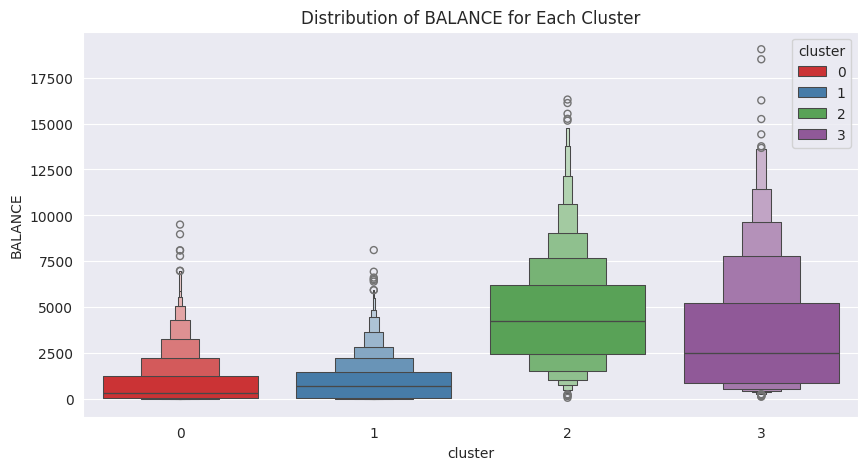

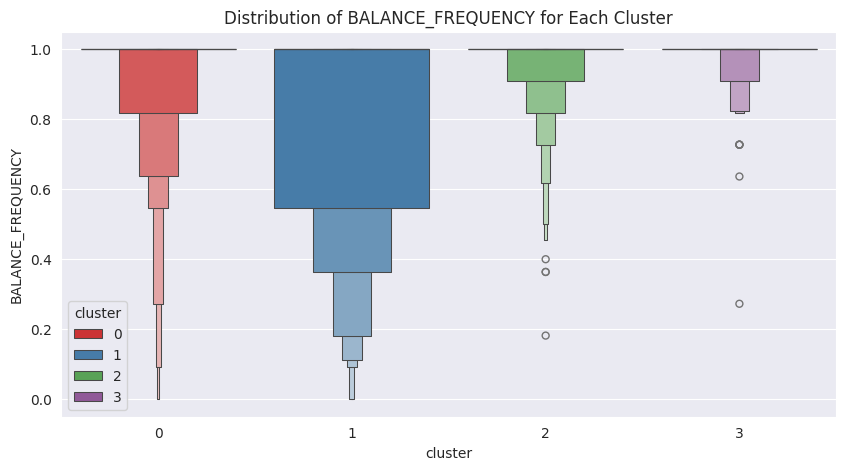

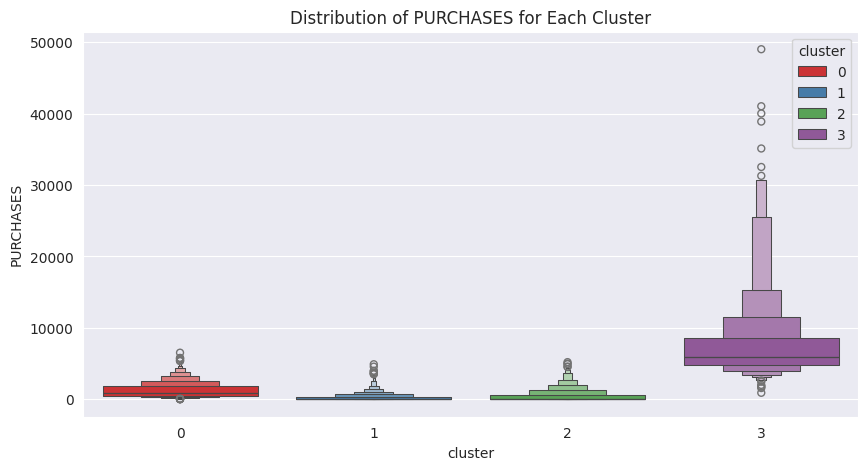

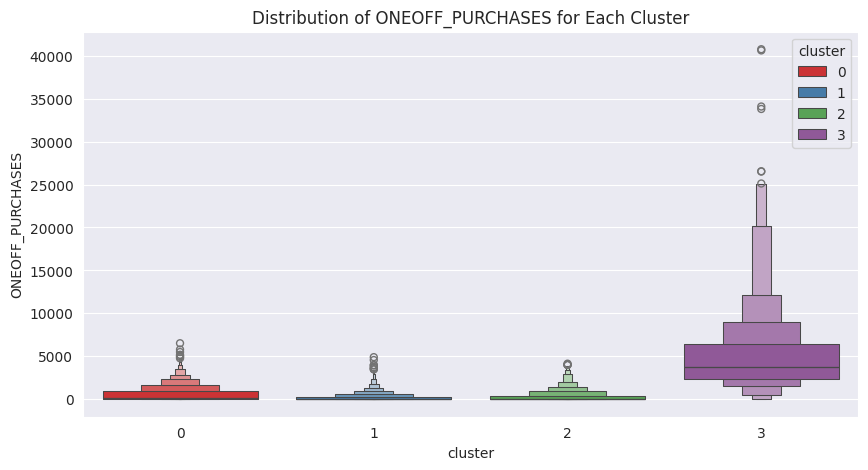

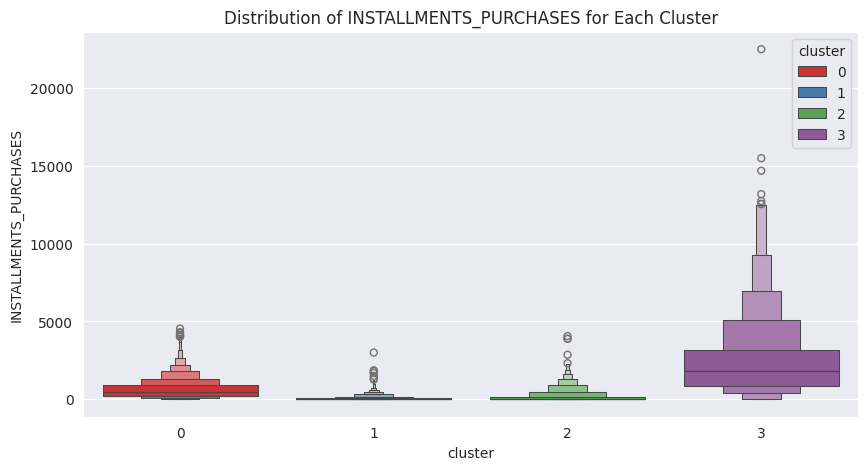

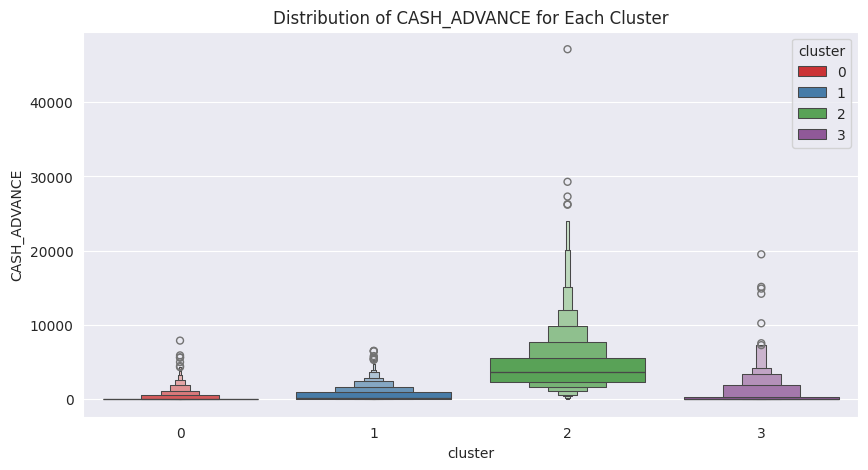

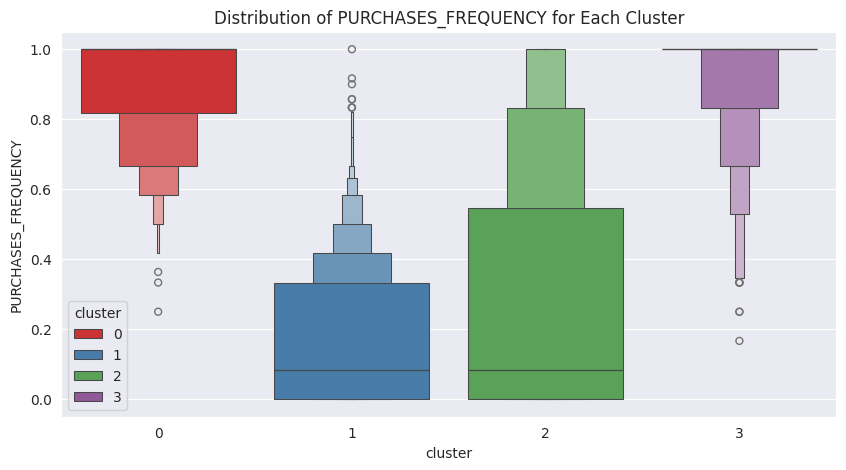

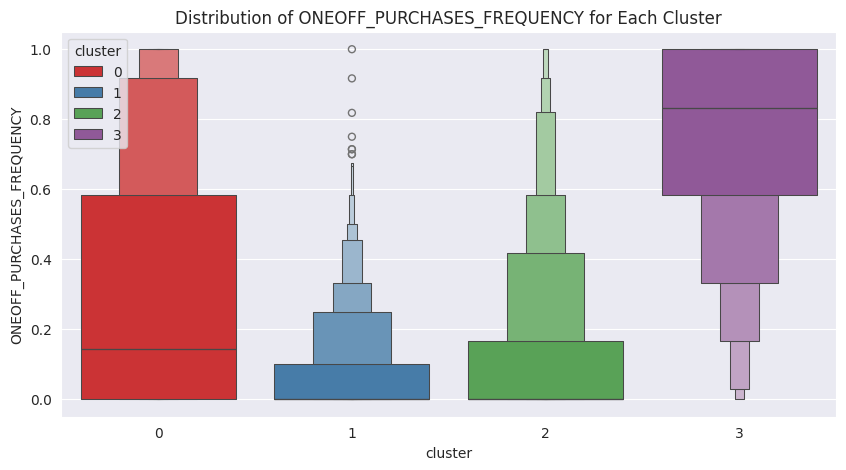

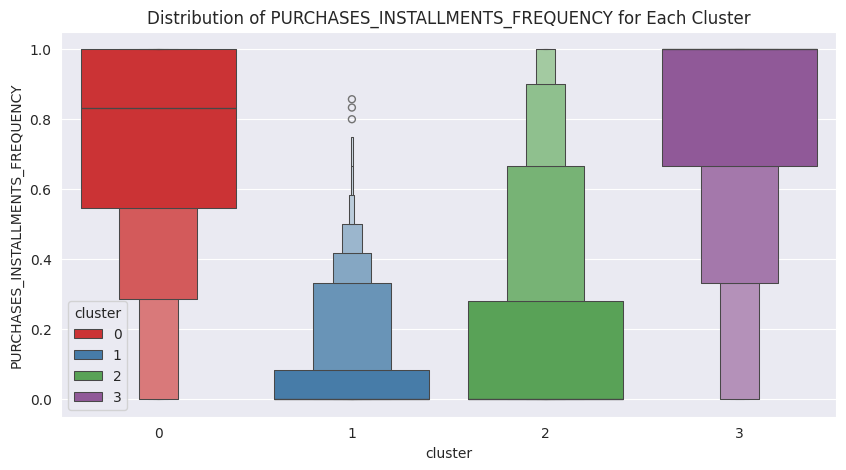

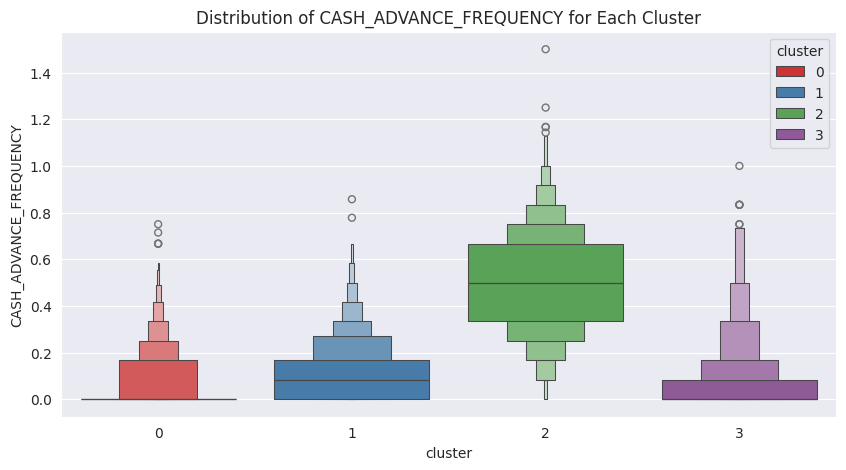

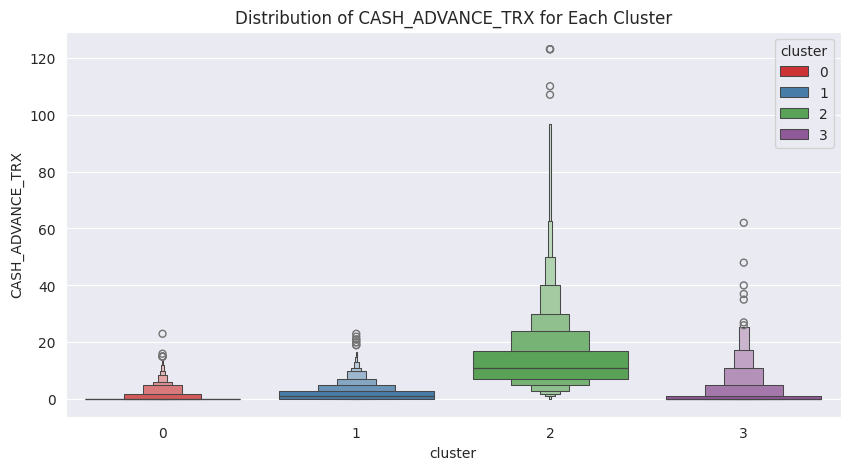

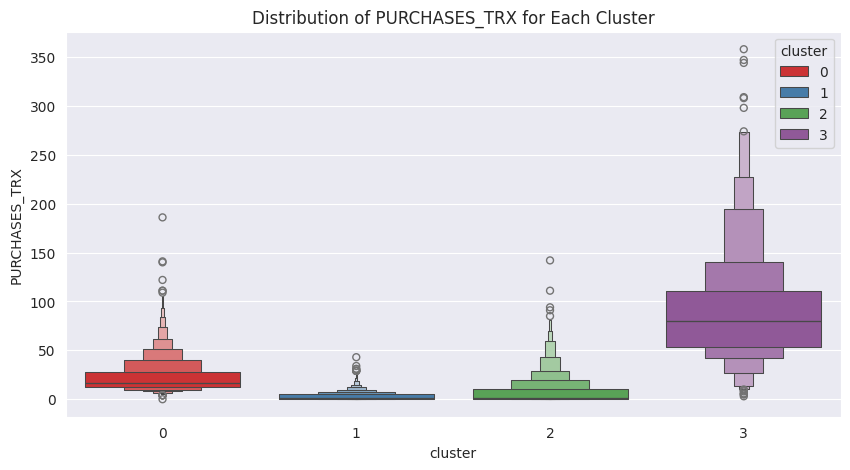

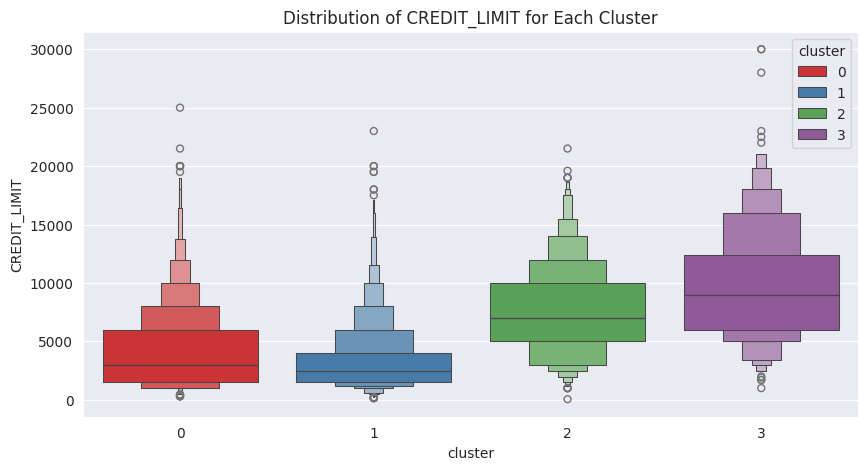

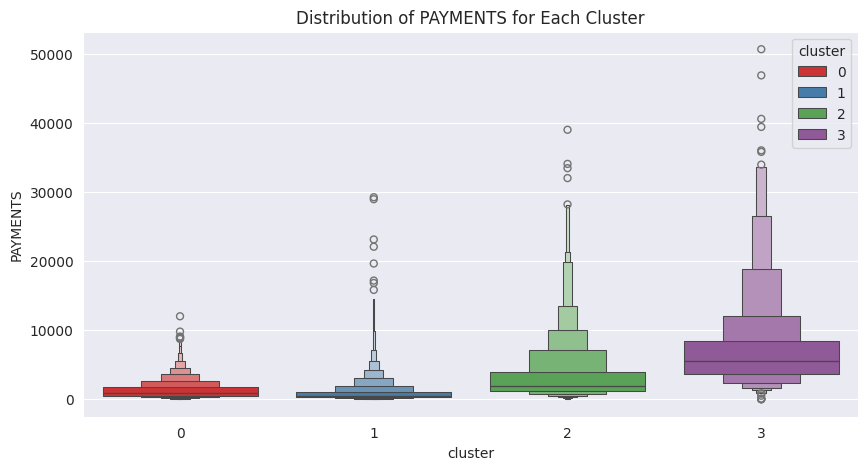

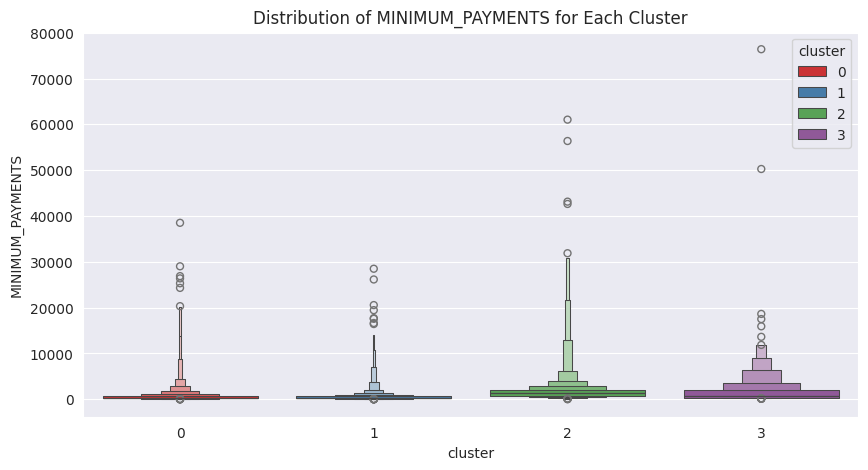

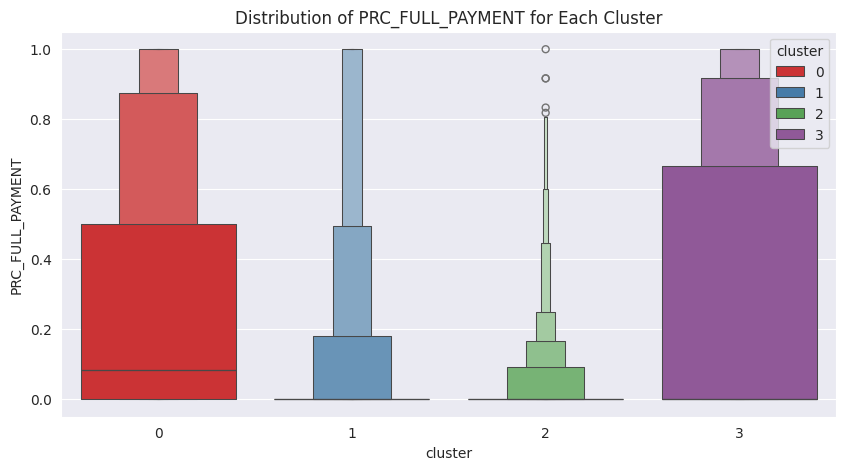

In [ ]:
for col in num_columns:
  plt.figure(figsize=(10, 5))
  sns.boxenplot(data= df,
                x="cluster",
                y=col,
                hue="cluster",
                order=sorted(df["cluster"].unique()),
                palette="Set1")
  plt.title(f"Distribution of {col} for Each Cluster")

## Conclutions

* Analyzing the scatter plot for each cluster we can say that all clusters are overlapped.
* Analyzing the categorical plots for each cluster we can se that 12 months of Tenure is common for each cluster. So Tenure has not any impact on defining the cluster.
* Analyzing the numerical features for each cluster we can find that:
  * BALANCE_FREQUENCY has no impact on clustering as in all clusters most of the customers updated the balance frequently.
  * MINIMUM_PAYMENTS has no impact on clustering as in all clusters minimum payments are same for customers.

**Cluster 0**
* Lower Balance
* Low Purchase in terms of total for an account, maximumin one go and in instalment.
* Cash in advance given by customer is lower.
* Frequency of Purchase Higher.
* Frequency of Purchase in one go is medium.
* Frequency of Purchase in instalment is higher.
* Frequency of Cash paid in advance is lower.
* Number of Transactions made with "Cash in Advanced" is lower.
* Number of purchase transactions made is medium.
* Credit limit upto 6000.
* Lower payments
* Percentage of full payment is medeum.

**Cluster 1**
* Lower Balance
* Low Purchase in terms of total for an account, maximumin one go and in instalment.
* Cash in advance given by customer is lower.
* Frequency of Purchase lower.
* Frequency of Purchase in one go is lowest.
* Frequency of Purchase in instalment is lowest.
* Frequency of Cash paid in advance is lower.
* Number of Transactions made with "Cash in Advanced" is medium.
* Number of purchase transactions made is lowest.
* Credit limit below 5000.
* Lowest payments
* Percentage of full payment is lower.


**Cluster 2**
* Higher Balance
* Low Purchase in terms of total for an account, maximumin one go and in instalment.
* Cash in advance given by customer is higher.
* Frequency of Purchase modarate.
* Frequency of Purchase in one go is lower.
* Frequency of Purchase in instalment is lower.
* Frequency of Cash paid in advance is medium.
* Number of Transactions made with "Cash in Advanced" is highest.
* Number of purchase transactions made is lower.
* Credit limit upto 10000.
* Medium payments
* Percentage of full payment is lowest.


**Cluster 3**
* Medium Balance
* Higer Purchase in terms of total for an account, maximumin one go and in instalment.
* Cash in advance given by customer is lower.
* Frequency of Purchase Higher.
* Frequency of Purchase in one go is highest.
* Frequency of Purchase in instalment is higher.
* Frequency of Cash paid in advance is lowest.
* Number of Transactions made with "Cash in Advanced" is lowest.
* Number of purchase transactions made is highest.
* Credit limit upto 12000.
* Highest payments
* Percentage of full payment is highest.


**Due to presence of outliers all clusters are overlapping with each other. Although using the above mentioned features we can segment the customers of crideit card holders.**

